## Лабораторная работа 2. Оганян 381808-1

### Задание

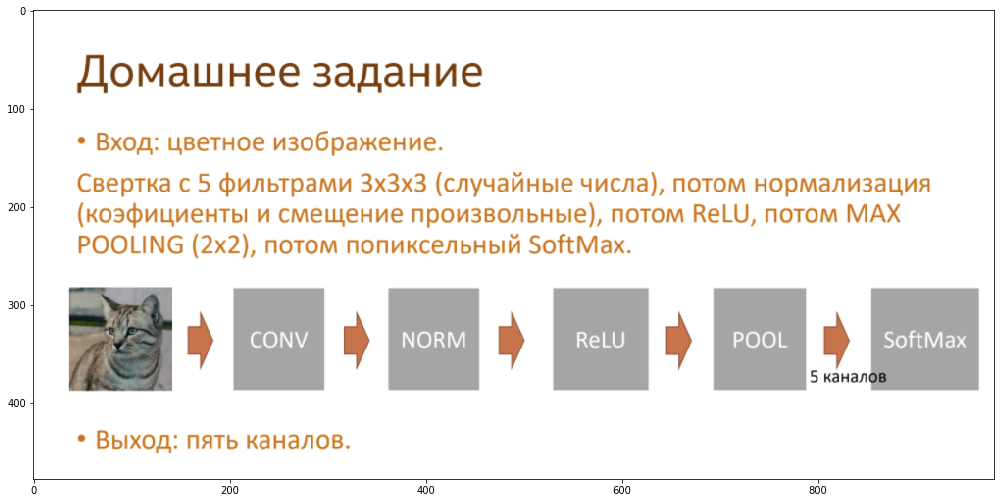

In [125]:
import cv2
import matplotlib.pyplot as plt
task = cv2.imread('task.PNG', cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(task, interpolation='nearest')
plt.tight_layout()

### Реализация

In [126]:
import numpy as np
from scipy.special import softmax
from scipy.signal import convolve
# from sk.image.measure

In [127]:
src_image = cv2.imread('cat.jpg')
src_image.shape

(1851, 1851, 3)

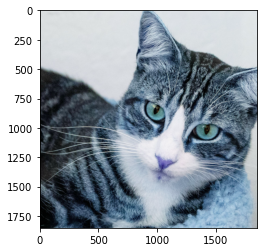

In [128]:
plt.imshow(src_image)

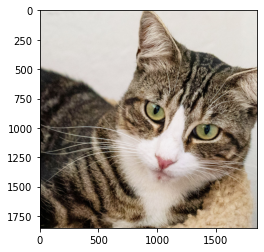

In [129]:
image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

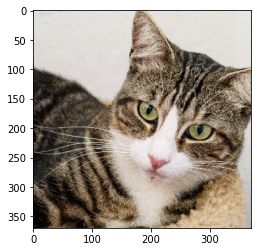

In [130]:
small_image = cv2.resize(image, (0,0), fx=0.2, fy=0.2)
plt.imshow(small_image)

### Шаги

#### 0. ReLu нормализация

In [131]:
def relu_activation(pixel, mod = 0):
    if mod == 0:
        return np.maximum(0, pixel)
        
    if mod == 1:
        return 1/(1 + numpy.exp(-1 * x))
        
    if mod == 2:
        return (numpy.exp(x) - numpy.exp(-1*x))/(numpy.exp(x) + numpy.exp(-1*x))
        
        

#### 1. Сверточный слой

In [132]:
def convolution(input_img):
    
    M = 5 
    R = 3
    S = R
    C = R
    F = input_img.shape[0]
    E = input_img.shape[1]
    C = input_img.shape[2]


    output = np.zeros((M, F, E), dtype=np.float32)
    weights = np.random.rand(M, C, R, S)
    B = np.zeros(M)

    for m in range(M):
        print("Processing Channel " + str(m))
        for x in range(F):
            for y in range(E):
                output[m, x, y] = B[m]
                for i in range(R):
                    for j in range(S):
                        for k in range(C):
                            x_ = min(x + i, F - 1)
                            y_ = min(y + j, C - 1)
                            output[m, x, y] += input_img[k, x_ , y_] * weights[m, k, i, j]
                output[m,x,y] = relu_activation(output[m,x,y])
    return output

#### 2. Дополнительная нормализация

gamma и beta - настраиваемые параметры, epsilon - погрешность

In [133]:
def batch_normalization(X, gamma, beta, epsilon):
    exp = X.mean(axis=0) # математическое ожидание пакета
    var = ((X - exp)**2).mean(axis=0) #дисперсия пакета    
    X_ = (X - exp) / np.sqrt(var + epsilon) #нормализация
    Y = gamma * X_ + beta #сжатие и сдвиг
    return Y

#### 3. Уменьшение размера, используя max or average pooling

In [134]:
def max_pooling(input_img, pool_size):
    out = np.zeros((input_img.shape[0], int(input_img.shape[1] /pool_size), int(input_img.shape[2] / pool_size)),
    dtype = np.int32)
    for m in range(out.shape[0]):
        for x in range(out.shape[1]):
            for y in range(out.shape[2]):
                out[m, x, y] = max(input_img[m, x * pool_size, y * pool_size],
                                   input_img[m, x * pool_size, y * pool_size + 1], 
                                   input_img[m, x * pool_size + 1, y * pool_size], 
                                   input_img[m, x * pool_size + 1, y * pool_size + 1])
    return out

#### 4. Попиксельный SoftMax

Softmax слой нормализует выход слоя в распределение верояностей.

In [135]:
def soft_max(x):
    return np.exp(x)/sum(np.exp(x))

#### 5. Собираем все воедино и выводим результат

In [136]:
def lab2(img):
    new_img = convolution(img)
    
    gamma = 0.5
    beta = 0.5
    eps = 1e-10
    
    for canal in range(new_img.shape[0]):
        batch_normalization(new_img[canal], gamma, beta, eps)
        
        
    for m in range(new_img.shape[0]):
        for x in range(new_img.shape[0]):
            for y in range(new_img.shape[0]):
                new_img[m, x, y] = relu_activation(new_img[m, x, y])
                
                
    result_img = max_pooling(new_img, 2)
    
    _, axes = plt.subplots(3, 2, figsize=(24, 24))
    
    for res in range(result_img.shape[0]):
        i = res // 2
        j = res%2
        axes[i][j].set_title("channel " + str(res))
        axes[i][j].imshow(result_img[res])
        axes[i][j].axis('off')

Processing Channel 0
Processing Channel 1
Processing Channel 2
Processing Channel 3
Processing Channel 4


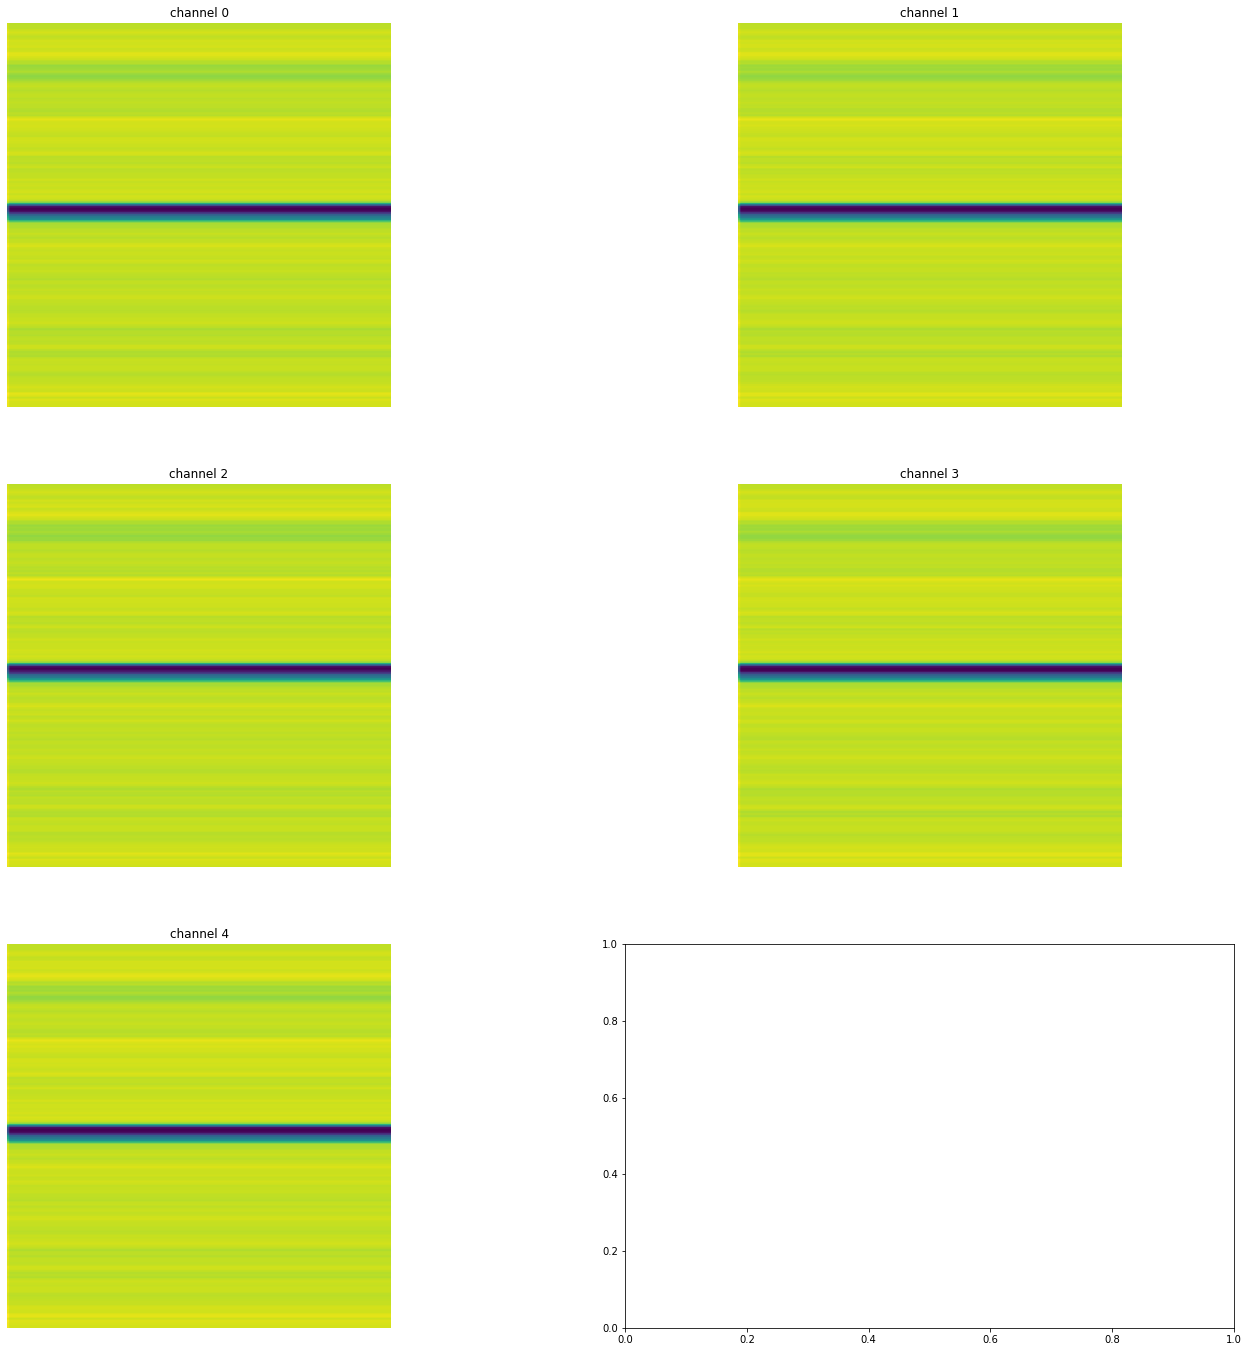

In [137]:
lab2(small_image)